In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/data/EvFiyatlari
# change directory
%pwd  # Ben neredeyim komutu
!ls    # İçerisinde ne var 

/content/drive/My Drive/Colab Notebooks/data/EvFiyatlari
data_description.txt  sample_submission.csv  test.csv  train.csv


In [41]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [42]:
original_data = pd.read_csv("train.csv")
data=original_data.copy()
original_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
kategorik=[i for i in data.columns if data[i].dtype=="object"]
surekli=[i for i in data.columns if (data[i].dtype=="int64" or data[i].dtype=="float64")]
konut=data
for i in kategorik:
    konut[i]=data[i].fillna("Null")
for i in surekli:
    konut[i]=data[i].fillna(0)

In [44]:
data=konut
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,Null,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Null,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Null,Null,Null,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,Null,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Null,Null,Null,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,Null,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Null,Null,Null,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,Null,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Null,Null,Null,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,Null,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Null,Null,Null,0,12,2008,WD,Normal,250000


In [45]:
Y = data['SalePrice']
X = data[['TotalBsmtSF','GrLivArea','LotArea','Street','CentralAir','RoofStyle','YearBuilt','LotFrontage']]
X.head()

,TotalBsmtSF,GrLivArea,LotArea,Street,CentralAir,RoofStyle,YearBuilt,LotFrontage
0,856,1710,8450,Pave,Y,Gable,2003,65.000
1,1262,1262,9600,Pave,Y,Gable,1976,80.000
2,920,1786,11250,Pave,Y,Gable,2001,68.000
3,756,1717,9550,Pave,Y,Gable,1915,60.000
4,1145,2198,14260,Pave,Y,Gable,2000,84.000


In [46]:
data['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [47]:
X=pd.get_dummies(X,prefix_sep='_',drop_first=True)
X.head()

,TotalBsmtSF,GrLivArea,LotArea,YearBuilt,LotFrontage,Street_Pave,CentralAir_Y,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,856,1710,8450,2003,65.000,1,1,1,0,0,0,0
1,1262,1262,9600,1976,80.000,1,1,1,0,0,0,0
2,920,1786,11250,2001,68.000,1,1,1,0,0,0,0
3,756,1717,9550,1915,60.000,1,1,1,0,0,0,0
4,1145,2198,14260,2000,84.000,1,1,1,0,0,0,0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [49]:
X = sm.add_constant(X)

In [50]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     223.6
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          5.44e-291
Time:                        20:40:41   Log-Likelihood:                -14111.
No. Observations:                1168   AIC:                         2.825e+04
Df Residuals:                    1155   BIC:                         2.831e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.739e+06   9.61e+04    -18.096      0.000   -1.93e+06   -1.55e+06
TotalBsmtSF          28.9339      3.658      7.910      0.000      21.757      36.110
GrLivArea            78.4074      2.756     28.453      0.000      73.001      83.814
LotArea               0.4906      0.129      3.816      0.000       0.238       0.743
YearBuilt           873.1625     48.341     18.063      0.000     778.317     968.008
LotFrontage          45.1741     37.696      1.198      0.231     -28.785     119.134
Street_Pave        2.035e+04   1.99e+04      1.021      0.308   -1.88e+04    5.94e+04
CentralAir_Y        1.25e+04   5466.990      2.286      0.022    1772.396    2.32e+04
RoofStyle_Gable    5303.4159   1.54e+04      0.345      0.730   -2.49e+04    3.55e+04
RoofStyle_Gambrel  2.038e+04   2.01e+04      1.014      0.311   -1.91e+04    5.98e+04
RoofStyle_Hip      1.994e+04   1.55e+04      1.282      0.200   -1.06e+04    5.04e+04
RoofStyle_Mansard  1.703e+04   2.64e+04      0.645      0.519   -3.48e+04    6.89e+04
RoofStyle_Shed    -8125.1879   3.41e+04     -0.238      0.812    -7.5e+04    5.88e+04
==============================================================================
Omnibus:                      609.532   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62288.787
Skew:                          -1.452   Prob(JB):                         0.00
Kurtosis:                      38.658   Cond. No.                     1.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

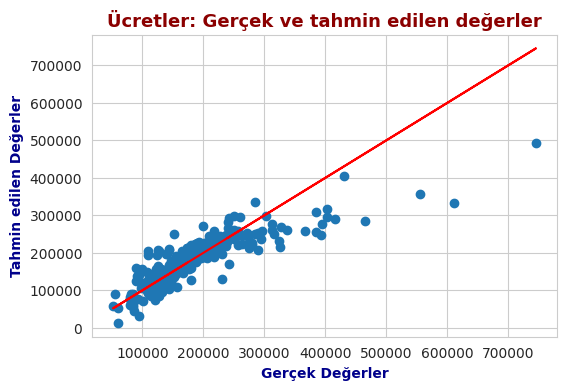

Ortalama Mutlak Hata (MAE)        : 28326.63838598479
Ortalama Kare Hata (MSE)          : 2025535444.6938715
Kök Ortalama Kare Hata (RMSE)     : 45005.94899225958
Ortalama Mutlak Yüzde Hata (MAPE) : 15.4702243572955


In [51]:
X_test = sm.add_constant(X_test)

y_preds = sonuclar.predict(X_test)

plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [52]:
X = data[['TotalBsmtSF','GrLivArea','LotArea','Street','CentralAir','YearBuilt','LotFrontage']]
X['LotConst']=data['LotFrontage']*data['LotArea']
X.head()

,TotalBsmtSF,GrLivArea,LotArea,Street,CentralAir,YearBuilt,LotFrontage,LotConst
0,856,1710,8450,Pave,Y,2003,65.000,549250.000
1,1262,1262,9600,Pave,Y,1976,80.000,768000.000
2,920,1786,11250,Pave,Y,2001,68.000,765000.000
3,756,1717,9550,Pave,Y,1915,60.000,573000.000
4,1145,2198,14260,Pave,Y,2000,84.000,1197840.000


In [53]:
Y = data['SalePrice']
X=pd.get_dummies(X,prefix_sep='_',drop_first=True)
X.head()

,TotalBsmtSF,GrLivArea,LotArea,YearBuilt,LotFrontage,LotConst,Street_Pave,CentralAir_Y
0,856,1710,8450,2003,65.000,549250.000,1,1
1,1262,1262,9600,1976,80.000,768000.000,1,1
2,920,1786,11250,2001,68.000,765000.000,1,1
3,756,1717,9550,1915,60.000,573000.000,1,1
4,1145,2198,14260,2000,84.000,1197840.000,1,1


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 1168
Test kümesindeki gözlem sayısı   : 292


In [55]:
X = sm.add_constant(X)

In [56]:
X_train = sm.add_constant(X_train)

sonuclar = sm.OLS(y_train, X_train).fit()

sonuclar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     344.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          3.70e-300
Time:                        20:40:42   Log-Likelihood:                -14102.
No. Observations:                1168   AIC:                         2.822e+04
Df Residuals:                    1159   BIC:                         2.827e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.733e+06   9.33e+04    -18.578      0.000   -1.92e+06   -1.55e+06
TotalBsmtSF     34.5585      3.537      9.771      0.000      27.619      41.498
GrLivArea       78.7407      2.720     28.954      0.000      73.405      84.076
LotArea          1.1351      0.162      7.020      0.000       0.818       1.452
YearBuilt      855.3475     47.411     18.041      0.000     762.326     948.369
LotFrontage    227.3800     45.613      4.985      0.000     137.886     316.874
LotConst        -0.0102      0.002     -6.400      0.000      -0.013      -0.007
Street_Pave   4.231e+04      2e+04      2.115      0.035    3064.347    8.16e+04
CentralAir_Y  1.149e+04   5408.076      2.125      0.034     879.684    2.21e+04
==============================================================================
Omnibus:                      358.280   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22892.962
Skew:                          -0.516   Prob(JB):                         0.00
Kurtosis:                      24.664   Cond. No.                     1.05e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [58]:
lrm = LinearRegression()
lrm.fit(X_egitim, y_egitim)

y_egitim_tahmini = lrm.predict(X_egitim)
y_test_tahmini = lrm.predict(X_test)

print("Eğitim kümesindeki gözlem sayısı  : {}".format(X_egitim.shape[0]))
print("Test kümesindeki gözlem sayısı    : {}".format(X_test.shape[0]), "\n")

print("Eğitim kümesindeki R-Kare değeri  : {}".format(lrm.score(X_egitim, y_egitim)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lrm.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesindeki gözlem sayısı  : 1168
Test kümesindeki gözlem sayısı    : 292 

Eğitim kümesindeki R-Kare değeri  : 0.7041228243086147
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : 0.7227769766474927
Ortalama Mutlak Hata (MAE)        : 28319.859994928116
Ortalama Kare Hata (MSE)          : 2008582488.5049
Kök Ortalama Kare Hata (RMSE)     : 44817.21196711036
Ortalama Mutlak Yüzde Hata (MAPE) : 15.310305547498684


In [59]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_egitim, y_egitim)

y_egitim_tahmini = ridgeregr.predict(X_egitim)
y_test_tahmini = ridgeregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_egitim, y_egitim)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.0
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : -0.0019389852335491842
Ortalama Mutlak Hata (MAE)        : 58947.449052355034
Ortalama Kare Hata (MSE)          : 7259415455.301054
Kök Ortalama Kare Hata (RMSE)     : 85202.20334768963
Ortalama Mutlak Yüzde Hata (MAPE) : 35.307207929644804


In [60]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_egitim, y_egitim)

y_egitim_tahmini = lassoregr.predict(X_egitim)
y_test_tahmini = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_egitim, y_egitim)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.0
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : -0.0019389852335491842
Ortalama Mutlak Hata (MAE)        : 58947.449052355034
Ortalama Kare Hata (MSE)          : 7259415455.301054
Kök Ortalama Kare Hata (RMSE)     : 85202.20334768963
Ortalama Mutlak Yüzde Hata (MAPE) : 35.307207929644804


In [61]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_egitim, y_egitim)

y_egitim_tahmini = elasticregr.predict(X_egitim)
y_test_tahmini = elasticregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(elasticregr.score(X_egitim, y_egitim)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(elasticregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_tahmini)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_tahmini)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_tahmini)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_tahmini) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.0
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : -0.0019389852335491842
Ortalama Mutlak Hata (MAE)        : 58947.449052355034
Ortalama Kare Hata (MSE)          : 7259415455.301054
Kök Ortalama Kare Hata (RMSE)     : 85202.20334768963
Ortalama Mutlak Yüzde Hata (MAPE) : 35.307207929644804
